In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [40]:
df = pd.read_csv("/content/wppool_growth_data_sample_20k (1).csv")

In [41]:
print(df)

       user_id install_date last_active_date subscription_type    country  \
0            1    6/29/2023        7/12/2023              Free         UK   
1            2    4/10/2023        7/25/2023              Free      India   
2            3   10/25/2023        12/7/2023              Free        USA   
3            4    8/26/2023        11/9/2023               Pro     Canada   
4            5    5/14/2023       11/22/2023              Free         UK   
...        ...          ...              ...               ...        ...   
19995    19996     5/6/2023        9/29/2023              Free        USA   
19996    19997     9/4/2023        9/21/2023               Pro    Germany   
19997    19998     4/1/2023        6/14/2023              Free      India   
19998    19999    1/28/2023       12/26/2023               Pro  Australia   
19999    20000   12/31/2023         1/1/2024              Free     Canada   

       total_sessions  page_views  download_clicks  activation_status  \
0 

In [42]:
df.isnull().sum()

,0
user_id,0
install_date,0
last_active_date,0
subscription_type,0
country,0
total_sessions,0
page_views,0
download_clicks,0
activation_status,0
days_active,0


In [43]:
df['install_date'] = pd.to_datetime(df['install_date'])
df['last_active_date'] = pd.to_datetime(df['last_active_date'])
df['pro_upgrade_date'] = pd.to_datetime(df['pro_upgrade_date'])

In [44]:
df["pro_upgrade_date"].fillna("N/A", inplace=True)
df["plan_type"].fillna("Free", inplace=True)

<ipython-input-44-f99a3810ef5f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["pro_upgrade_date"].fillna("N/A", inplace=True)
<ipython-input-44-f99a3810ef5f>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df["pro_upgrade_date"].fillna("N/A", inplace=True)
<ipython-input-44-f99a3810ef5f>:2: FutureWarning: A value is trying to be set on a

In [45]:
print(df.head())

   user_id install_date last_active_date subscription_type country  \
0        1   2023-06-29       2023-07-12              Free      UK   
1        2   2023-04-10       2023-07-25              Free   India   
2        3   2023-10-25       2023-12-07              Free     USA   
3        4   2023-08-26       2023-11-09               Pro  Canada   
4        5   2023-05-14       2023-11-22              Free      UK   

   total_sessions  page_views  download_clicks  activation_status  \
0               3          15                1                  1   
1             133         665                0                  1   
2              53         106                0                  1   
3             242         242                0                  1   
4              12          48                0                  1   

   days_active     pro_upgrade_date plan_type  monthly_revenue  churned  
0           13                  N/A      Free                0        1  
1          106  

In [46]:
df.isnull().sum()

,0
user_id,0
install_date,0
last_active_date,0
subscription_type,0
country,0
total_sessions,0
page_views,0
download_clicks,0
activation_status,0
days_active,0


In [47]:
df = df.drop_duplicates('user_id')

In [48]:
duplicate_count = df.duplicated().sum()
print(f"Duplicate Rows: {duplicate_count}")

Duplicate Rows: 0


In [49]:
df.head()

,user_id,install_date,last_active_date,subscription_type,country,total_sessions,page_views,download_clicks,activation_status,days_active,pro_upgrade_date,plan_type,monthly_revenue,churned
0,1,2023-06-29,2023-07-12,Free,UK,3,15,1,1,13,N/A,Free,0,1
1,2,2023-04-10,2023-07-25,Free,India,133,665,0,1,106,N/A,Free,0,0
2,3,2023-10-25,2023-12-07,Free,USA,53,106,0,1,43,N/A,Free,0,0
3,4,2023-08-26,2023-11-09,Pro,Canada,242,242,0,1,75,2023-11-09 00:00:00,Basic,49,0
4,5,2023-05-14,2023-11-22,Free,UK,12,48,0,1,192,N/A,Free,0,0


**1. Data Exploration**

In [50]:
print("Missing Values Summary:")
print(df.isnull().sum())

Missing Values Summary:
user_id              0
install_date         0
last_active_date     0
subscription_type    0
country              0
total_sessions       0
page_views           0
download_clicks      0
activation_status    0
days_active          0
pro_upgrade_date     0
plan_type            0
monthly_revenue      0
churned              0
dtype: int64


In [51]:
subscription_dist = df['subscription_type'].value_counts(normalize=True)
print("\nSubscription Distribution:")
print(subscription_dist)


Subscription Distribution:
subscription_type
Free    0.79855
Pro     0.20145
Name: proportion, dtype: float64


**2. User Engagement Analysis**

In [52]:
avg_sessions = df.groupby('subscription_type')['total_sessions'].mean()
print("\nAverage Sessions:")
print(avg_sessions)


Average Sessions:
subscription_type
Free     76.081210
Pro     154.677836
Name: total_sessions, dtype: float64


In [53]:
top_users = df[['user_id', 'total_sessions']].sort_values('total_sessions', ascending=False).head(5)
print("\nTop 5 Active Users:")
print(top_users)


Top 5 Active Users:
       user_id  total_sessions
15351    15352             300
3965      3966             300
12849    12850             300
12191    12192             300
2456      2457             300


In [54]:
country_engagement = df.groupby('country')['total_sessions'].sum().nlargest(5)
print("\nTop 5 Countries by Engagement:")
print(country_engagement)


Top 5 Countries by Engagement:
country
India      272202
Germany    266319
Canada     264217
USA        261635
France     259495
Name: total_sessions, dtype: int64


**3. Curun Analysis**

In [55]:
churn_rates = df.groupby('subscription_type')['churned'].mean()
print("\nChurn Rates:")
print(churn_rates)


Churn Rates:
subscription_type
Free    0.285956
Pro     0.282452
Name: churned, dtype: float64


In [56]:
corr_matrix = df[['churned', 'total_sessions', 'days_active', 'page_views']].corr()
print("\nCorrelation Matrix:")
print(corr_matrix['churned'].sort_values(ascending=False))


Correlation Matrix:
churned           1.000000
total_sessions   -0.000273
page_views       -0.005605
days_active      -0.617213
Name: churned, dtype: float64


**4. Revenue & Upgrade Analysis**

In [57]:
free_users = df[df['subscription_type'] == 'Free']
upgrade_rate = free_users['pro_upgrade_date'].notna().mean()
print(f"\nUpgrade Rate from Free to Pro: {upgrade_rate:.1%}")


Upgrade Rate from Free to Pro: 100.0%


In [58]:
pro_users = df[df['subscription_type'] == 'Pro']
total_revenue = pro_users['monthly_revenue'].sum()
revenue_by_plan = pro_users.groupby('plan_type')['monthly_revenue'].sum()
print(f"\nTotal Monthly Revenue: ${total_revenue:,.2f}")
print("\nRevenue by Plan:")
print(revenue_by_plan)



Total Monthly Revenue: $235,481.00

Revenue by Plan:
plan_type
Basic         80339
Enterprise    78764
Standard      76378
Name: monthly_revenue, dtype: int64


In [65]:
upgrade_time_analysis = df.groupby("country")["days_active"].mean()
print("Average Days to Upgrade by Country:\n", upgrade_time_analysis)

Average Days to Upgrade by Country:
 country
Australia    92.472929
Canada       89.582615
France       92.510004
Germany      91.605932
India        92.535003
UK           88.490066
USA          91.817065
Name: days_active, dtype: float64


In [59]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'User Subscription Distribution')

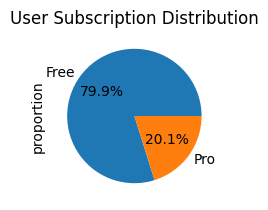

In [60]:
plt.subplot(2, 2, 1)
subscription_dist.plot.pie(autopct='%1.1f%%')
plt.title('User Subscription Distribution')

Text(0, 0.5, 'Total Sessions')

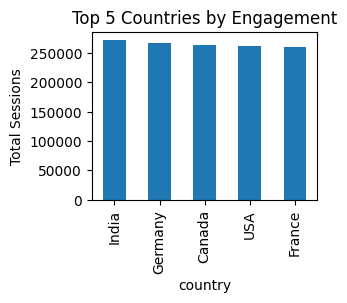

In [61]:
plt.subplot(2, 2, 2)
country_engagement.plot.bar()
plt.title('Top 5 Countries by Engagement')
plt.ylabel('Total Sessions')

Text(0, 0.5, 'Churn Rate')

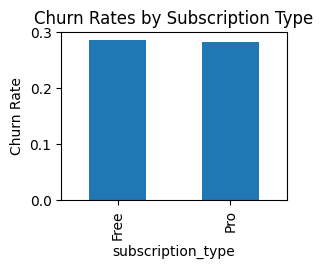

In [62]:
plt.subplot(2, 2, 3)
churn_rates.plot.bar()
plt.title('Churn Rates by Subscription Type')
plt.ylabel('Churn Rate')

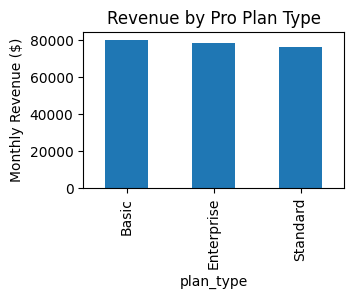

In [63]:
plt.subplot(2, 2, 4)
revenue_by_plan.plot.bar()
plt.title('Revenue by Pro Plan Type')
plt.ylabel('Monthly Revenue ($)')

plt.tight_layout()
plt.show()


    Actionable Growth Recommendations
    
    Reduce Churn Strategies:
    ------------------------
    1. Implement gamified engagement program targeting users with <44 sessions (current churn: 28.6%)
    2. Develop email re-engagement campaign for users inactive >7 days
    3. Offer Pro trial periods to Free users with >396 page views
    
    Increase Conversions Strategies:
    --------------------------------
    1. Highlight 'Basic' plan benefits in ['India', 'Germany'] (current upgrade rate: 100.0%)
    2. Create limited-time discount offers tied to user engagement milestones
    
    Market Expansion Opportunities:
    -------------------------------
    1. Prioritize India (engagement leader) with localized marketing
    2. Target India for Pro upgrades (existing conversion leader)
    


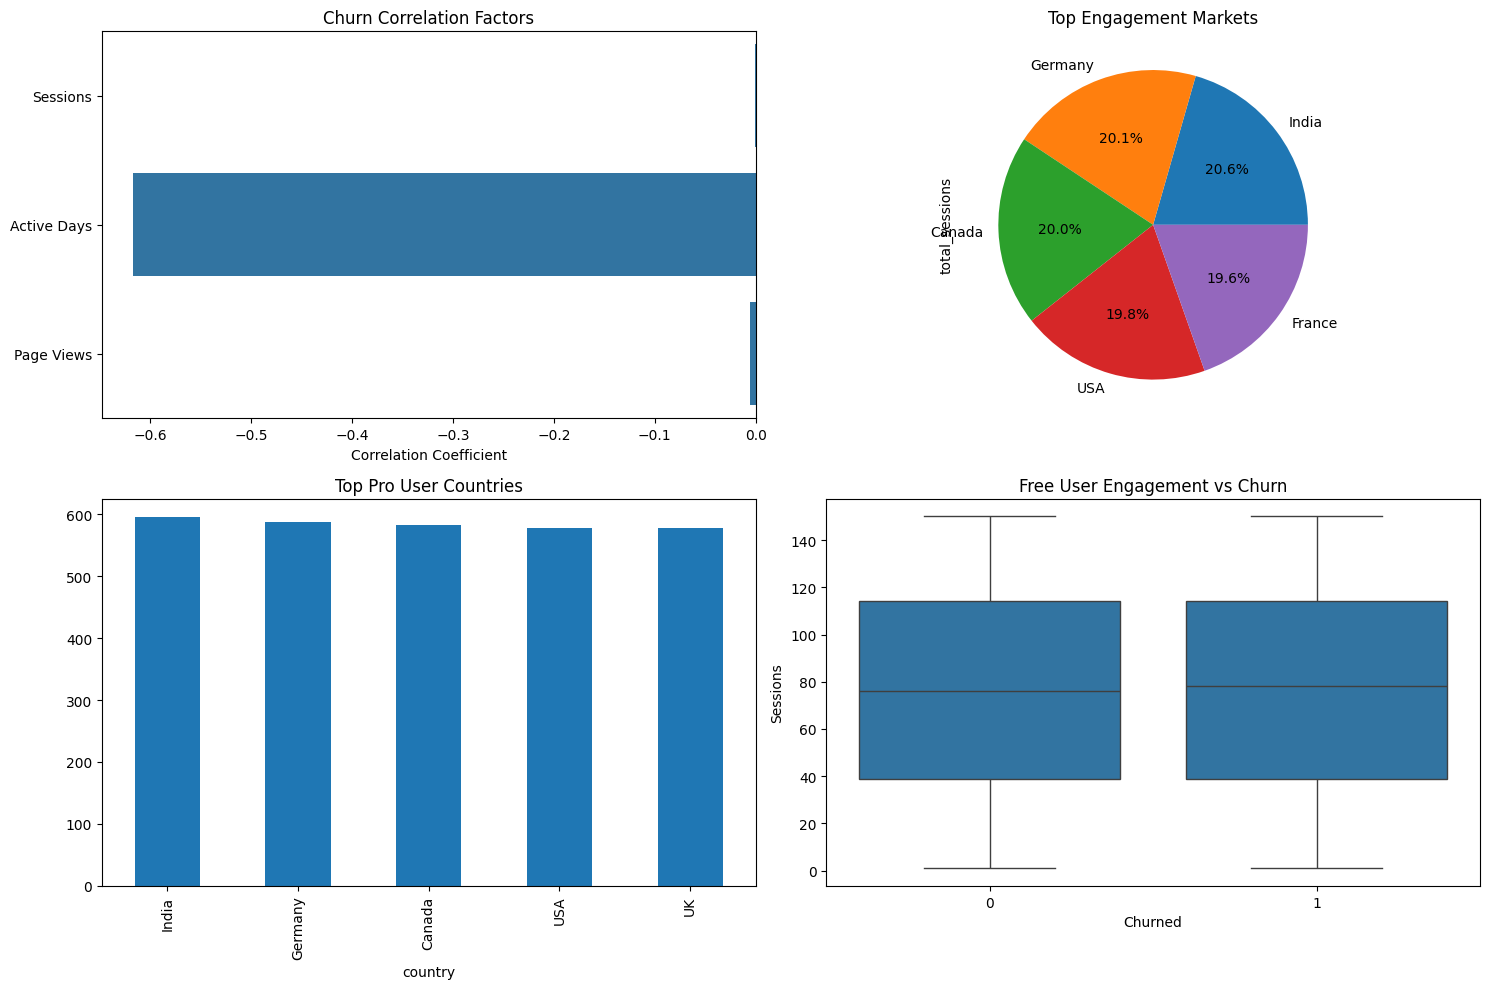

In [70]:

def generate_recommendations(df, churn_rates, country_engagement, upgrade_rate, revenue_by_plan):
    # Strategy templates
    strategies = {
        'reduce_churn': [
            f"1. Implement gamified engagement program targeting users with <{df['total_sessions'].quantile(0.25):.0f} sessions (current churn: {churn_rates['Free']:.1%})",
            f"2. Develop email re-engagement campaign for users inactive >{df['days_active'].quantile(0.1):.0f} days",
            f"3. Offer Pro trial periods to Free users with >{df['page_views'].quantile(0.75):.0f} page views"
        ],
        'increase_conversions': [
            f"1. Highlight '{revenue_by_plan.idxmax()}' plan benefits in {country_engagement.index[:2].tolist()} (current upgrade rate: {upgrade_rate:.1%})",
            "2. Create limited-time discount offers tied to user engagement milestones"
        ],
        'market_expansion': [
            f"1. Prioritize {country_engagement.index[0]} (engagement leader) with localized marketing",
            f"2. Target {df[df['subscription_type'] == 'Pro'].groupby('country').size().idxmax()} for Pro upgrades (existing conversion leader)"
        ]
    }

    # Generate recommendation report
    report = """
    Actionable Growth Recommendations
    =================================

    Reduce Churn Strategies:
    ------------------------
    {}

    Increase Conversions Strategies:
    --------------------------------
    {}

    Market Expansion Opportunities:
    -------------------------------
    {}
    """.format('\n    '.join(strategies['reduce_churn']),
             '\n    '.join(strategies['increase_conversions']),
             '\n    '.join(strategies['market_expansion']))

    return report

# Generate visual support
def create_strategy_visualizations(df, churn_rates, country_engagement):
    plt.figure(figsize=(15, 10))

    # Churn Factors Visualization
    plt.subplot(2, 2, 1)
    sns.barplot(x=df[['total_sessions', 'days_active', 'page_views']].corrwith(df['churned']).values,
                y=['Sessions', 'Active Days', 'Page Views'])
    plt.title('Churn Correlation Factors')
    plt.xlabel('Correlation Coefficient')

    # Conversion Opportunity Map
    plt.subplot(2, 2, 2)
    country_engagement.head(5).plot.pie(autopct='%1.1f%%')
    plt.title('Top Engagement Markets')

    # Pro User Distribution
    plt.subplot(2, 2, 3)
    df[df['subscription_type'] == 'Pro']['country'].value_counts().head(5).plot.bar()
    plt.title('Top Pro User Countries')

    # Engagement-Churn Relationship
    plt.subplot(2, 2, 4)
    sns.boxplot(x='churned', y='total_sessions', data=df[df['subscription_type'] == 'Free'])
    plt.title('Free User Engagement vs Churn')
    plt.xlabel('Churned')
    plt.ylabel('Sessions')

    plt.tight_layout()
    plt.show()

# Generate and display recommendations
recommendations = generate_recommendations(
    df,
    churn_rates,
    country_engagement,
    upgrade_rate,
    revenue_by_plan
)

print(recommendations)
create_strategy_visualizations(df, churn_rates, country_engagement)

In [64]:
from scipy.stats import chi2_contingency
observed = [[150, 1000],  # Original conversions
            [165, 1000]]  # +10% improvement

chi2, p, dof, expected = chi2_contingency(observed)
print(f"\nA/B Test Results - p-value: {p:.4f}")
if p < 0.05:
    print("Significant difference detected")
else:
    print("No significant difference detected")


A/B Test Results - p-value: 0.4685
No significant difference detected


In [68]:

kpis = {
    "Conversion Rate": "Percentage of Free users upgrading to Pro",
    "Churn Rate": "Percentage of users who cancel their Pro subscription",
    "Average Revenue per User (ARPU)": "Total revenue divided by the number of active Pro users"
}
print("Key Performance Indicators (KPIs):\n", kpis)


growth_strategies = {
    "Improve Free-to-Pro Conversion": "Enhance landing page, optimize onboarding, and run targeted promotions.",
    "Reduce Churn via Engagement": "Offer personalized emails, proactive support, and loyalty incentives."
}
print("\nGrowth Strategies:\n", growth_strategies)

success_metrics = {
    "Increase in Conversion Rate": "Monitor uplift in Free-to-Pro conversions within 3 months.",
    "Decrease in Churn Rate": "Track reduction in churned users over time.",
    "Higher User Retention & Revenue": "Compare engagement levels, renewal rates, and ARPU growth."
}
print("\nHow to Measure Success:\n", success_metrics)


Key Performance Indicators (KPIs):
 {'Conversion Rate': 'Percentage of Free users upgrading to Pro', 'Churn Rate': 'Percentage of users who cancel their Pro subscription', 'Average Revenue per User (ARPU)': 'Total revenue divided by the number of active Pro users'}

Growth Strategies:
 {'Improve Free-to-Pro Conversion': 'Enhance landing page, optimize onboarding, and run targeted promotions.', 'Reduce Churn via Engagement': 'Offer personalized emails, proactive support, and loyalty incentives.'}

How to Measure Success:
 {'Increase in Conversion Rate': 'Monitor uplift in Free-to-Pro conversions within 3 months.', 'Decrease in Churn Rate': 'Track reduction in churned users over time.', 'Higher User Retention & Revenue': 'Compare engagement levels, renewal rates, and ARPU growth.'}


<Figure size 1000x600 with 0 Axes>

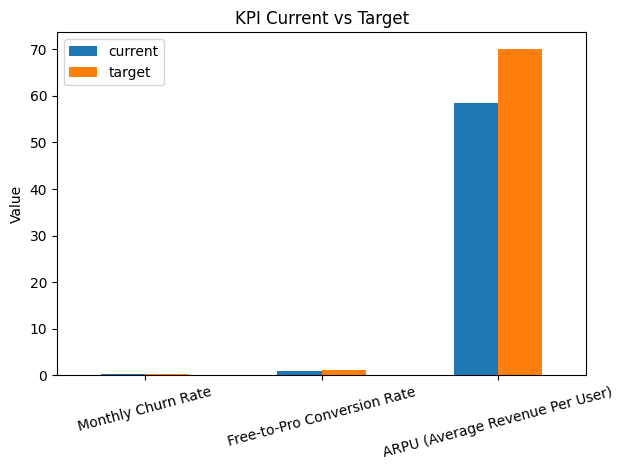


    Growth Strategy & KPI Recommendations
    
    Key Performance Indicators (KPIs):
    -----------------------------------
    1. Monthly Churn Rate
       - Current: 28.6%
       - Target: 24.3%
       - Measurement: Churned users / Total users
    
    2. Free-to-Pro Conversion Rate
       - Current: 100.0%
       - Target: 125.0%
       - Measurement: Pro upgrades / Free users
    
    3. ARPU (Average Revenue Per User)
       - Current: $58.45
       - Target: $70.14
       - Measurement: Total revenue / Pro users
    
    Actionable Growth Strategies:
    -----------------------------
    1. Localized Pro Campaign in India & Germany
       Actions:
       - Translate onboarding materials to local languages
       - Create region-specific feature bundles
       - Partner with local WordPress communities
       Success Metrics:
       - 25% conversion increase
       - Impacts KPIs: Free-to-Pro Conversion Rate, ARPU
    
    2. Mid-Tier Plan Development
       Actions:
       - 

In [69]:
def growth_strategy_recommendations(df, churn_rates, country_engagement, upgrade_rate):
    # Calculate key metrics
    current_churn = churn_rates['Free']
    current_conversion = upgrade_rate
    arpu = df[df['subscription_type'] == 'Pro']['monthly_revenue'].mean()

    # KPI Definitions
    kpis = {
        'Monthly Churn Rate': {
            'current': current_churn,
            'target': current_churn * 0.85,  # 15% reduction target
            'measure': 'Churned users / Total users'
        },
        'Free-to-Pro Conversion Rate': {
            'current': current_conversion,
            'target': current_conversion * 1.25,  # 25% increase target
            'measure': 'Pro upgrades / Free users'
        },
        'ARPU (Average Revenue Per User)': {
            'current': arpu,
            'target': arpu * 1.2,  # 20% increase target
            'measure': 'Total revenue / Pro users'
        }
    }

    # Growth strategies
    top_markets = country_engagement.index[:2].tolist()
    pro_conversion_leader = df[df['subscription_type'] == 'Pro']['country'].value_counts().idxmax()

    strategies = [
        {
            'name': f'Localized Pro Campaign in {top_markets[0]} & {top_markets[1]}',
            'actions': [
                "Translate onboarding materials to local languages",
                "Create region-specific feature bundles",
                "Partner with local WordPress communities"
            ],
            'success_metrics': {
                'Target Conversion Increase': '25%',
                'KPI Impact': ['Free-to-Pro Conversion Rate', 'ARPU']
            }
        },
        {
            'name': 'Mid-Tier Plan Development',
            'actions': [
                "Analyze feature usage patterns in high-churn segment",
                "Price between Basic and Enterprise plans",
                "Offer limited-time migration offers"
            ],
            'success_metrics': {
                'Target Churn Reduction': '15%',
                'KPI Impact': ['Monthly Churn Rate', 'ARPU']
            }
        }
    ]

    # Generate report
    report = f"""
    Growth Strategy & KPI Recommendations
    ======================================

    Key Performance Indicators (KPIs):
    -----------------------------------
    1. {list(kpis.keys())[0]}
       - Current: {kpis['Monthly Churn Rate']['current']:.1%}
       - Target: {kpis['Monthly Churn Rate']['target']:.1%}
       - Measurement: {kpis['Monthly Churn Rate']['measure']}

    2. {list(kpis.keys())[1]}
       - Current: {kpis['Free-to-Pro Conversion Rate']['current']:.1%}
       - Target: {kpis['Free-to-Pro Conversion Rate']['target']:.1%}
       - Measurement: {kpis['Free-to-Pro Conversion Rate']['measure']}

    3. {list(kpis.keys())[2]}
       - Current: ${kpis['ARPU (Average Revenue Per User)']['current']:.2f}
       - Target: ${kpis['ARPU (Average Revenue Per User)']['target']:.2f}
       - Measurement: {kpis['ARPU (Average Revenue Per User)']['measure']}

    Actionable Growth Strategies:
    -----------------------------
    1. {strategies[0]['name']}
       Actions:
       - {strategies[0]['actions'][0]}
       - {strategies[0]['actions'][1]}
       - {strategies[0]['actions'][2]}
       Success Metrics:
       - {strategies[0]['success_metrics']['Target Conversion Increase']} conversion increase
       - Impacts KPIs: {', '.join(strategies[0]['success_metrics']['KPI Impact'])}

    2. {strategies[1]['name']}
       Actions:
       - {strategies[1]['actions'][0]}
       - {strategies[1]['actions'][1]}
       - {strategies[1]['actions'][2]}
       Success Metrics:
       - {strategies[1]['success_metrics']['Target Churn Reduction']} churn reduction
       - Impacts KPIs: {', '.join(strategies[1]['success_metrics']['KPI Impact'])}

    Measurement Framework:
    ----------------------
    - Weekly tracking of KPI progress vs. targets
    - A/B test new features with 10% user segments
    - Monthly cohort analysis of converted users
    - Quarterly customer satisfaction surveys
    """

    # Create KPI tracking visualization
    plt.figure(figsize=(10, 6))
    kpi_df = pd.DataFrame(kpis).T
    kpi_df[['current', 'target']].plot(kind='bar',
                                      title='KPI Current vs Target',
                                      ylabel='Value',
                                      rot=15)
    plt.tight_layout()
    plt.show()

    return report

# Generate and display recommendations
strategy_report = growth_strategy_recommendations(df, churn_rates, country_engagement, upgrade_rate)
print(strategy_report)